In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 数据获取及降维
iris = load_iris()
X = iris.data
y = iris.target

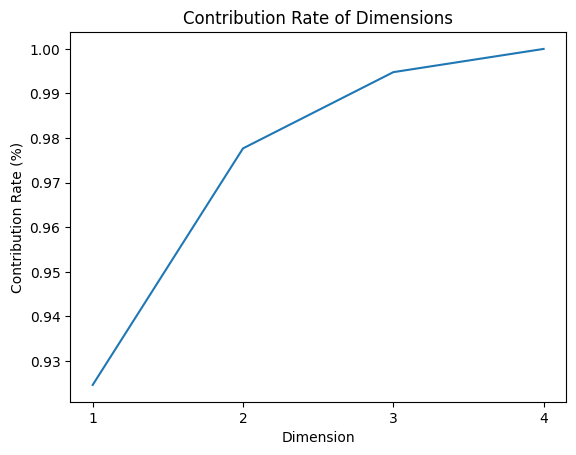

In [2]:
# PCA降维
pca = PCA(n_components=4)
pca.fit(X)

# 绘制贡献率图
dimensions = np.arange(1, len(pca.explained_variance_ratio_) + 1)
contribution = np.cumsum(pca.explained_variance_ratio_)
plt.plot(dimensions, contribution)
plt.xlabel('Dimension')
plt.ylabel('Contribution Rate (%)')
plt.xticks(dimensions.astype(int))
plt.title('Contribution Rate of Dimensions')
plt.show()

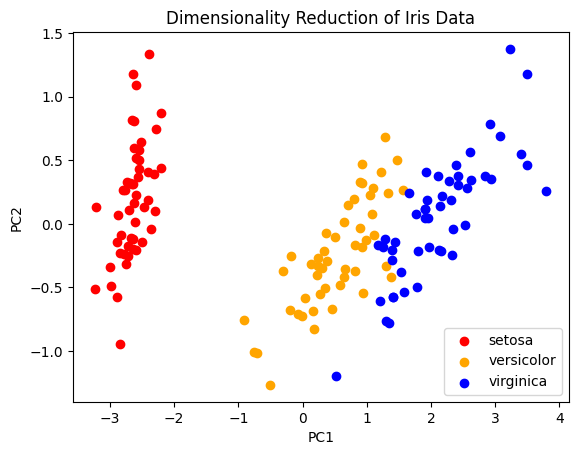

In [3]:
# PCA降维
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# 绘制降维后的数据
colors = ['red', 'orange', 'blue']
for target in np.unique(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=colors[target], label=iris.target_names[target])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimensionality Reduction of Iris Data')
plt.legend()
plt.show()

In [4]:
# 自定义K-Means聚类算法
class KMeans:
    def __init__(self, k, times):
        self.k = k
        self.times = times
        self.centroids = None

    def fit(self, X):
        self.centroids = X[np.random.choice(range(X.shape[0]), size=self.k, replace=False)]
        
        for _ in range(self.times):
            distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=-1)
            labels = np.argmin(distances, axis=-1)
            
            for i in range(self.k):
                self.centroids[i] = np.mean(X[labels == i], axis=0)

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=-1)
        labels = np.argmin(distances, axis=-1)
        return labels

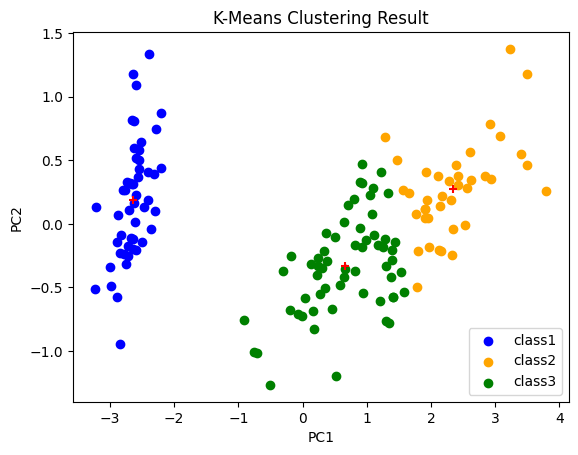

In [5]:
# 进行聚类并绘制聚类结果
kmeans = KMeans(k=3, times=10)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

# 绘制聚类结果
colors = ['blue', 'orange', 'green']
class_labels = ['class1', 'class2', 'class3'] 
for label in np.unique(labels):
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], c=colors[label], label=class_labels[label])

plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Result')
plt.legend()
plt.show()

In [6]:
# 输出相关信息
print("贡献率 =", pca.explained_variance_ratio_)
print("特征的方差 =", pca.explained_variance_)
print("降维前数据\n", pd.DataFrame(X))
print("降维后数据\n", pd.DataFrame(X_pca))

贡献率 = [0.92461872 0.05306648 0.01710261 0.00521218]
特征的方差 = [4.22824171 0.24267075 0.0782095  0.02383509]
降维前数据
        0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
降维后数据
             0         1         2         3
0   -2.684126  0.319397 -0.027915 -0.002262
1   -2.714142 -0.177001 -0.210464 -0.099027
2   -2.888991 -0.144949  0.017900 -0.019968
3   -2.745343 -0.318299  0.031559  0.075576
4   -2.728717  0.326755  0.090079  0.061259
..        ...       ...       ...       ...
145  1.944110  0.187532  0.177825 -0.426196
146  1.527167 -0.375317 -0.121898 -0.254367
147  1.764346  0.078859  0.130482 -0.137001
148  1.900942  0.116628  0.723252 -0.044595
149  1.390189 -0.282661  0.362910  0.155039

[150 rows x 4 columns]
